### Project 3 - Comparison of Data Generation with GANs
#### Group Partners:<br> 1. Syed Huzaifa Nafees - 25378<br> 2. Syed Muzammil Ahmed - 25371<br> Blog Link: https://medium.com/@muzammila784/exploring-the-power-of-tabular-generative-adversarial-networks-gans-7342fa3dc4fa

In [1]:
import pandas as pd
from tabgan.sampler import GANGenerator, OriginalGenerator
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec
from math import sqrt

import warnings
warnings.filterwarnings("ignore") 

#### Introduction:
Generative adversarial networks, commonly known as GANS, are one of the latest data generation models in machine learning. GANS were invented by Ian Goodfellow in 2014. GANS uses two neural networks to generate samples of data. One neural network is known as a "generator," and the other is known as a "discriminator." The generator network generates new data samples, while the discriminator network evaluates the authenticity of the generated samples. The generator seeks to create samples from real data that are similar to one another, and the discriminator tries to accurately determine whether a sample is real or produced. The two networks are trained in an adversarial process. While the discriminator attempts to accurately determine if a sample is real or created, the goal of the GAN is to train the generator to produce samples that are identical to real data. The generator gains the ability to produce fresh, synthetic data that is comparable to the training data through this procedure. GANs have a wide range of uses in computer vision, natural language processing, and other areas of machine learning. They have been successful in producing realistic images, audio, and text.

#### Datasets

We are using 3 classification and 2 regression datasets to check the performance of machine learning models on actual data and their performance on GAN-generated data.

#### Classification:

1- Audit Risk Dataset

2- Default Credit Card Dataset

3: Loan Application Dataset

#### Regression:

1- Wine Quality Prediction

2- Yacht Hydro Forecast

## Audit Risk Dataset (Classification)
https://archive.ics.uci.edu/ml/datasets/Audit+Data<br>
The goal of the dataset is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

In [72]:
# loading the dataset
df = pd.read_csv("audit_risk.csv")
print(df.shape)
df.head()

(776, 27)


,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [73]:
# Replace null values with the mean for each column
df = df.fillna(df.mean())

In [74]:
# Dropping unimpactful colums
df.drop('LOCATION_ID',axis=1,inplace=True)

In [75]:
# Split the DataFrame into input features (X) and target variable (y)
X = df.loc[:, df.columns != 'Risk']
y = df[['Risk']]

In [76]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a list of tuples containing the name of the model and the model itself
models = [
    ('XGBClassifier', xgb.XGBClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('LogisticRegression', LogisticRegression()),
    ('LinearSVC', LinearSVC()),
    ('KNeighborsClassifier', KNeighborsClassifier())
]

# create a dataframe to store the results
org_results = pd.DataFrame(columns=['Model', 'Accuracy', 'ROC AUC', 'F1 Score'])

# fit each model to the transformed data and evaluate its performance
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    org_results = org_results.append({'Model': name, 'Accuracy': acc, 'ROC AUC': roc, 'F1 Score': f1}, ignore_index=True)

# display the results
print(org_results)

                    Model  Accuracy   ROC AUC  F1 Score
0           XGBClassifier  1.000000  1.000000  1.000000
1  DecisionTreeClassifier  1.000000  1.000000  1.000000
2  RandomForestClassifier  0.993590  0.991667  0.991597
3      LogisticRegression  0.993590  0.991667  0.991597
4               LinearSVC  0.980769  0.981250  0.975207
5    KNeighborsClassifier  0.980769  0.981250  0.975207


In [77]:
# generating data using CLGAN
clgan_test_x, clgan_test_y = GANGenerator().generate_data_pipe(X_train, y_train, X_test, )
print(clgan_test_x.shape)

Fitting CTGAN transformers for each column:   0%|          | 0/26 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

(594, 25)


In [78]:
# create a list of tuples containing the name of the model and the model itself
models = [
    ('XGBClassifier', xgb.XGBClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('LogisticRegression', LogisticRegression()),
    ('LinearSVC', LinearSVC()),
    ('KNeighborsClassifier', KNeighborsClassifier())
]

# create a dataframe to store the results
clgan_results = pd.DataFrame(columns=['Model', 'Accuracy', 'ROC AUC', 'F1 Score'])

# fit each model to the transformed data and evaluate its performance
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(clgan_test_x)
    acc = accuracy_score(clgan_test_y, y_pred)
    roc = roc_auc_score(clgan_test_y, y_pred)
    f1 = f1_score(clgan_test_y, y_pred)
    clgan_results = clgan_results.append({'Model': name, 'Accuracy': acc, 'ROC AUC': roc, 'F1 Score': f1}, ignore_index=True)

# display the results
print(clgan_results)

                    Model  Accuracy   ROC AUC  F1 Score
0           XGBClassifier  1.000000  1.000000  1.000000
1  DecisionTreeClassifier  1.000000  1.000000  1.000000
2  RandomForestClassifier  1.000000  1.000000  1.000000
3      LogisticRegression  0.996633  0.995434  0.995413
4               LinearSVC  0.994949  0.993151  0.993103
5    KNeighborsClassifier  0.986532  0.982685  0.981481


In [79]:
# generating data using CLGAN
para_gan_test_x, para_gan_test_y  = GANGenerator(gen_x_times=1.5, cat_cols=None,
           bot_filter_quantile=0.001, top_filter_quantile=0.999, is_post_process=True,
           adversarial_model_params={
               "metrics": "AUC", "max_depth": 5, "max_bin": 100, 
               "learning_rate": 0.05, "random_state": 42, "n_estimators": 600,
           }, pregeneration_frac=2, only_generated_data=False,
           gan_params = {"batch_size": 250, "patience": 1000, "epochs" : 800,}).generate_data_pipe(X_train, y_train,
                                          X_test, deep_copy=True, only_adversarial=False, use_adversarial=True)

Fitting CTGAN transformers for each column:   0%|          | 0/26 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/800 [00:00<?, ?it/s]

In [80]:
# create a list of tuples containing the name of the model and the model itself
models = [
    ('XGBClassifier', xgb.XGBClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('LogisticRegression', LogisticRegression()),
    ('LinearSVC', LinearSVC()),
    ('KNeighborsClassifier', KNeighborsClassifier())
]

# create a dataframe to store the results
para_gan_results = pd.DataFrame(columns=['Model', 'Accuracy', 'ROC AUC', 'F1 Score'])

# fit each model to the transformed data and evaluate its performance
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(para_gan_test_x)
    acc = accuracy_score(para_gan_test_y, y_pred)
    roc = roc_auc_score(para_gan_test_y, y_pred)
    f1 = f1_score(para_gan_test_y, y_pred)
    para_gan_results = para_gan_results.append({'Model': name, 'Accuracy': acc, 'ROC AUC': roc, 'F1 Score': f1}, ignore_index=True)

# display the results
print(para_gan_results)

                    Model  Accuracy   ROC AUC  F1 Score
0           XGBClassifier  1.000000  1.000000  1.000000
1  DecisionTreeClassifier  1.000000  1.000000  1.000000
2  RandomForestClassifier  1.000000  1.000000  1.000000
3      LogisticRegression  0.996633  0.995434  0.995413
4               LinearSVC  1.000000  1.000000  1.000000
5    KNeighborsClassifier  0.986532  0.982685  0.981481


In [81]:
# generating data using TGAN
tgan_test_x, tgan_test_y = OriginalGenerator().generate_data_pipe(X_train, y_train, X_test, )
print(tgan_test_x.shape)

(1781, 25)


In [82]:
# create a list of tuples containing the name of the model and the model itself
models = [
    ('XGBClassifier', xgb.XGBClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('LogisticRegression', LogisticRegression()),
    ('LinearSVC', LinearSVC()),
    ('KNeighborsClassifier', KNeighborsClassifier())
]

# create a dataframe to store the results
tgan_results = pd.DataFrame(columns=['Model', 'Accuracy', 'ROC AUC', 'F1 Score'])

# fit each model to the transformed data and evaluate its performance
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(tgan_test_x)
    acc = accuracy_score(tgan_test_y, y_pred)
    roc = roc_auc_score(tgan_test_y, y_pred)
    f1 = f1_score(tgan_test_y, y_pred)
    tgan_results = tgan_results.append({'Model': name, 'Accuracy': acc, 'ROC AUC': roc, 'F1 Score': f1}, ignore_index=True)

# display the results
print(tgan_results)

                    Model  Accuracy   ROC AUC  F1 Score
0           XGBClassifier  1.000000  1.000000  1.000000
1  DecisionTreeClassifier  1.000000  1.000000  1.000000
2  RandomForestClassifier  1.000000  1.000000  1.000000
3      LogisticRegression  0.995508  0.993651  0.993610
4               LinearSVC  1.000000  1.000000  1.000000
5    KNeighborsClassifier  0.989332  0.985280  0.984714


### Distribution plot for original vs all the generated data

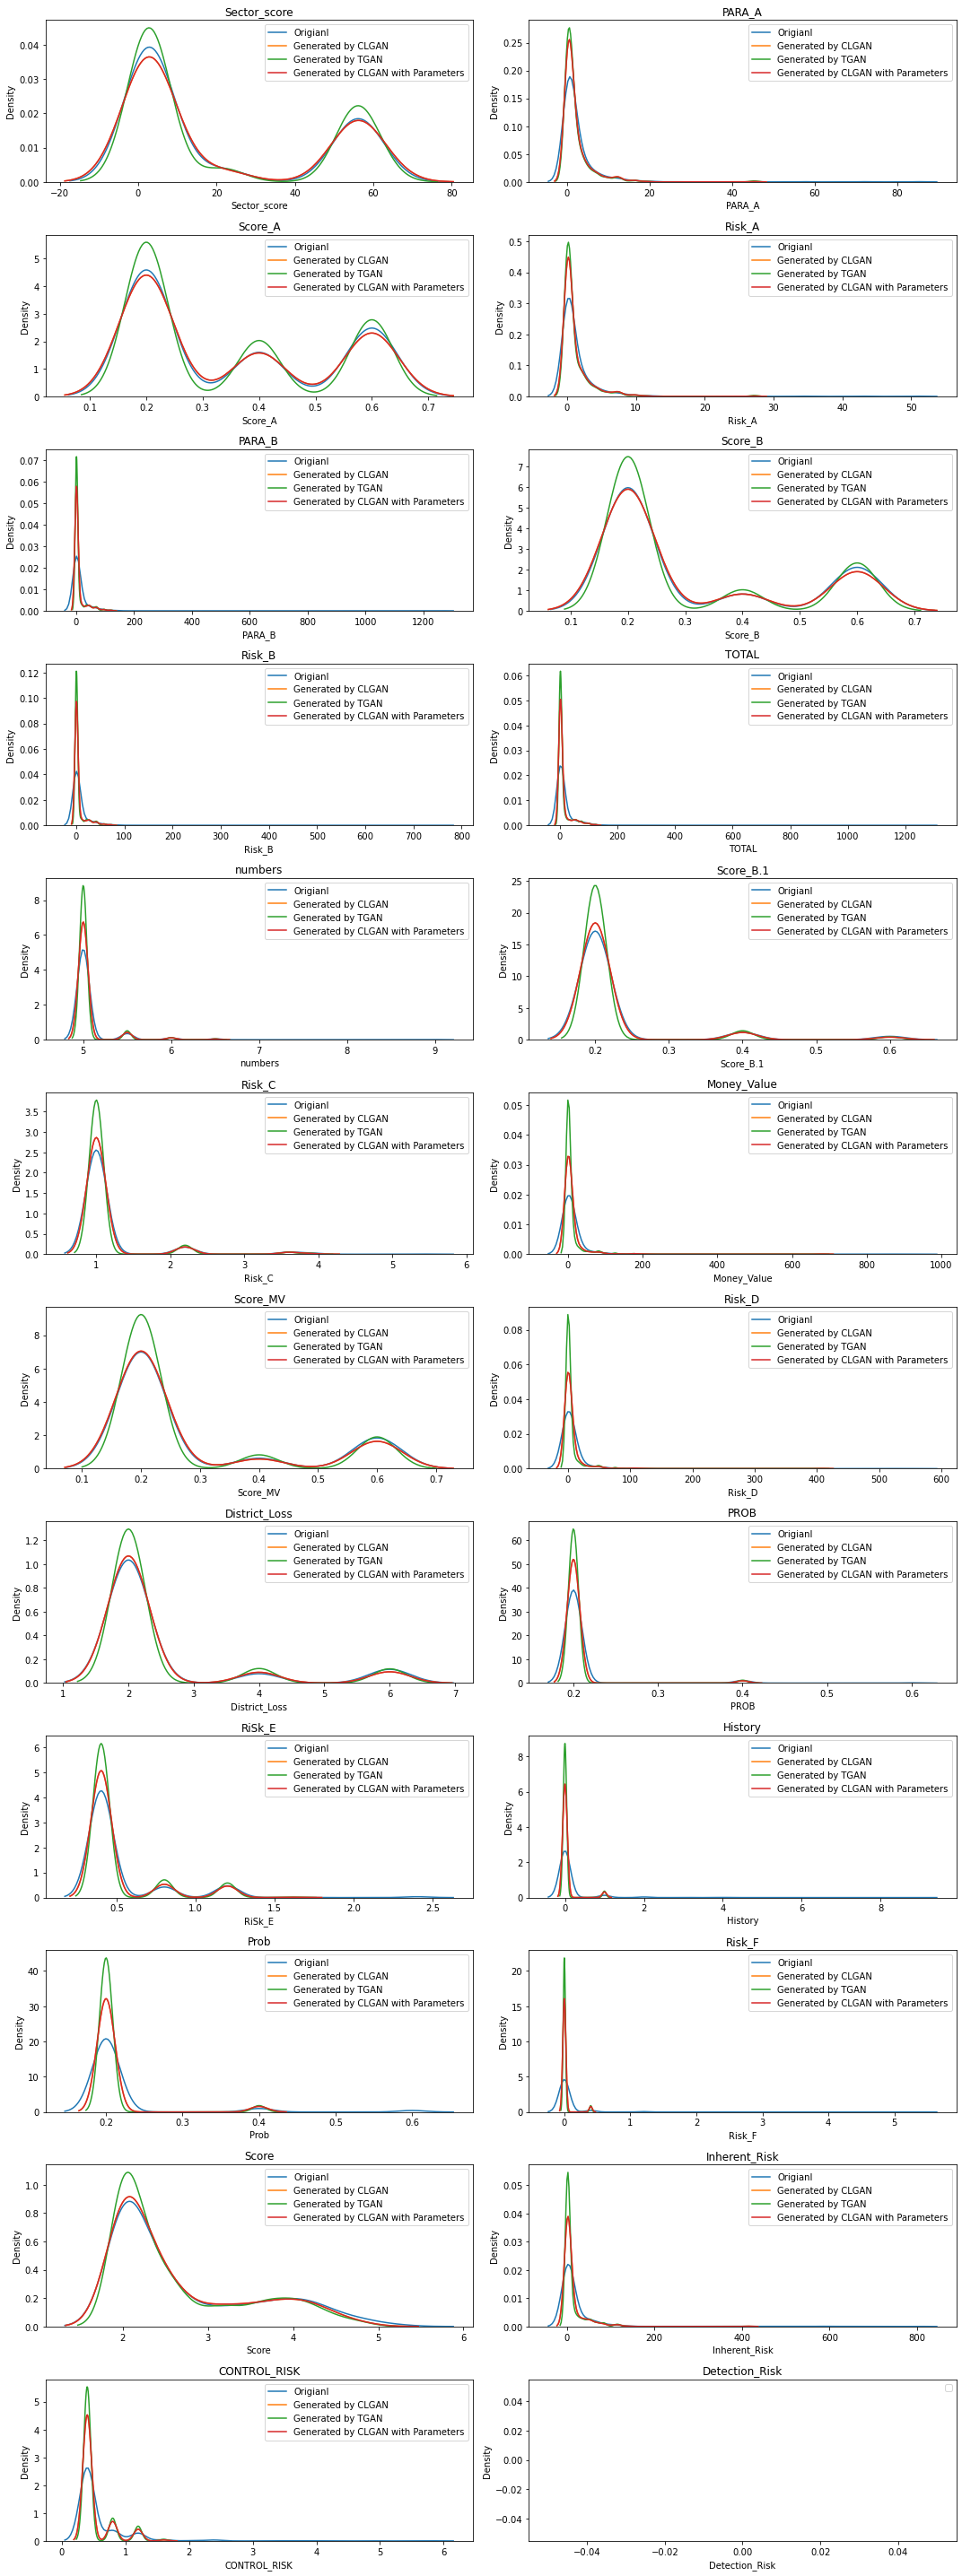

In [83]:
# plotting the distributions of original vs generated data

columns = X.columns

num_rows = len(columns) // 2

fig, axs = plt.subplots(num_rows, 2, figsize=(15, 40))

for ax, col in zip(axs.flatten(), columns):
    sns.kdeplot(X[col], ax=ax, label='Origianl')
    sns.kdeplot(clgan_test_x[col], ax=ax, label='Generated by CLGAN')
    sns.kdeplot(tgan_test_x[col], ax=ax, label='Generated by TGAN')
    sns.kdeplot(para_gan_test_x[col], ax=ax, label='Generated by CLGAN with Parameters')
    ax.set_title(col)
    ax.legend()

plt.tight_layout()

#### Analysis:<br>
##### It is observed that with the generated data from CLGAN, the performance of the models was increased and the distribution of the original data vs the CLGAN generated data is quite similar. TGAN also gave good results and the distribution was very similar too.

In [14]:
#Compiling Model Results:
audit_results = pd.concat([org_results,
                                clgan_results,
                                para_gan_results,
                                tgan_results,
                                ], axis = 1, keys =['Original Data', 'CGan Generated Data', 'CGAN + Hyperparameters','TGAN'])
audit_results

Original Data                                \
                    Model  Accuracy   ROC AUC  F1 Score   
0           XGBClassifier  1.000000  1.000000  1.000000   
1  DecisionTreeClassifier  1.000000  1.000000  1.000000   
2  RandomForestClassifier  0.993590  0.991667  0.991597   
3      LogisticRegression  0.993590  0.991667  0.991597   
4               LinearSVC  0.987179  0.989583  0.983607   
5    KNeighborsClassifier  0.980769  0.981250  0.975207   

      CGan Generated Data                                \
                    Model  Accuracy   ROC AUC  F1 Score   
0           XGBClassifier  1.000000  1.000000  1.000000   
1  DecisionTreeClassifier  1.000000  1.000000  1.000000   
2  RandomForestClassifier  1.000000  1.000000  1.000000   
3      LogisticRegression  0.996633  0.995434  0.995413   
4               LinearSVC  0.993266  0.994667  0.990950   
5    KNeighborsClassifier  0.986532  0.982685  0.981481   

   CGAN + Hyperparameters                                \
                    Model  Accuracy   ROC AUC  F1 Score   
0           XGBClassifier  1.000000  1.000000  1.000000   
1  DecisionTreeClassifier  1.000000  1.000000  1.000000   
2  RandomForestClassifier  1.000000  1.000000  1.000000   
3      LogisticRegression  0.996633  0.995434  0.995413   
4               LinearSVC  1.000000  1.000000  1.000000   
5    KNeighborsClassifier  0.986532  0.982685  0.981481   

                     TGAN                                
                    Model  Accuracy   ROC AUC  F1 Score  
0           XGBClassifier  1.000000  1.000000  1.000000  
1  DecisionTreeClassifier  1.000000  1.000000  1.000000  
2  RandomForestClassifier  1.000000  1.000000  1.000000  
3      LogisticRegression  0.995508  0.993651  0.993610  
4               LinearSVC  0.997754  0.996825  0.996815  
5    KNeighborsClassifier  0.989332  0.985280  0.984714

## Loan Application Dataset (Classification)
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [15]:
# loading the dataset
df = pd.read_csv("df1_loan.csv")
print(df.shape)
df.head()

(500, 14)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [16]:
# dropping columns that are not required
df=df.drop(["Loan_ID"],axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             491 non-null    object 
 1   Married            497 non-null    object 
 2   Dependents         488 non-null    float64
 3   Education          500 non-null    object 
 4   Self_Employed      473 non-null    object 
 5   ApplicantIncome    500 non-null    int64  
 6   CoapplicantIncome  500 non-null    float64
 7   LoanAmount         482 non-null    float64
 8   Loan_Amount_Term   486 non-null    float64
 9   Credit_History     459 non-null    float64
 10  Property_Area      500 non-null    object 
 11  Loan_Status        500 non-null    object 
 12  Total_Income       500 non-null    float64
dtypes: float64(6), int64(1), object(6)
memory usage: 50.9+ KB


In [18]:
# checking if there are missing values
df.isnull().sum()

Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

In [19]:
# Replace null values with the mean for numeric columns
df = df.fillna(df.mean())

# Replace null values with the mode for categoric columns
df = df.fillna(df.mode().iloc[0])

In [20]:
# Select the categorical columns
cat_columns = df.select_dtypes(include='object').columns

# Encode the categorical columns using integer encoding
for col in cat_columns:
    df[col] = df[col].astype('category').cat.codes

# Convert the encoded columns to the int64 data type
df[cat_columns] = df[cat_columns].astype('int64')

In [21]:
# Split the DataFrame into input features (X) and target variable (y)
X = df.loc[:, df.columns != 'Loan_Status']
y = df[['Loan_Status']]

In [22]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a list of tuples containing the name of the model and the model itself
models = [
    ('XGBClassifier', xgb.XGBClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('LogisticRegression', LogisticRegression()),
    ('LinearSVC', LinearSVC()),
    ('KNeighborsClassifier', KNeighborsClassifier())
]

# create a dataframe to store the results
org_results = pd.DataFrame(columns=['Model', 'Accuracy', 'ROC AUC', 'F1 Score'])

# fit each model to the transformed data and evaluate its performance
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    org_results = org_results.append({'Model': name, 'Accuracy': acc, 'ROC AUC': roc, 'F1 Score': f1}, ignore_index=True)

# display the results
print(org_results)

                    Model  Accuracy   ROC AUC  F1 Score
0           XGBClassifier      0.79  0.723469  0.855172
1  DecisionTreeClassifier      0.78  0.742871  0.840580
2  RandomForestClassifier      0.87  0.799205  0.912752
3      LogisticRegression      0.84  0.750818  0.894737
4               LinearSVC      0.69  0.500000  0.816568
5    KNeighborsClassifier      0.63  0.474287  0.767296


In [23]:
# generating data using CLGAN
clgan_test_x, clgan_test_y = GANGenerator().generate_data_pipe(X_train, y_train, X_test, )

Fitting CTGAN transformers for each column:   0%|          | 0/13 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

In [24]:
# create a list of tuples containing the name of the model and the model itself
models = [
    ('XGBClassifier', xgb.XGBClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('LogisticRegression', LogisticRegression()),
    ('LinearSVC', LinearSVC()),
    ('KNeighborsClassifier', KNeighborsClassifier())
]

# create a dataframe to store the results
clgan_results = pd.DataFrame(columns=['Model', 'Accuracy', 'ROC AUC', 'F1 Score'])

# fit each model to the transformed data and evaluate its performance
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(clgan_test_x)
    acc = accuracy_score(clgan_test_y, y_pred)
    roc = roc_auc_score(clgan_test_y, y_pred)
    f1 = f1_score(clgan_test_y, y_pred)
    clgan_results = clgan_results.append({'Model': name, 'Accuracy': acc, 'ROC AUC': roc, 'F1 Score': f1}, ignore_index=True)

# display the results
print(clgan_results)

                    Model  Accuracy   ROC AUC  F1 Score
0           XGBClassifier  0.737977  0.735896  0.791557
1  DecisionTreeClassifier  0.771144  0.769533  0.809392
2  RandomForestClassifier  0.719735  0.717446  0.781371
3      LogisticRegression  0.615257  0.612288  0.717762
4               LinearSVC  0.505804  0.501727  0.669623
5    KNeighborsClassifier  0.588723  0.585807  0.696822


In [25]:
# generating data using CLGAN with Parameters
para_gan_test_x, para_gan_test_y  = GANGenerator(gen_x_times=4.1, cat_cols=None,
           bot_filter_quantile=0.001, top_filter_quantile=0.999, is_post_process=True,
           adversarial_model_params={
               "metrics": "AUC", "max_depth": 29, "max_bin": 1000, 
               "learning_rate": 1.02, "random_state": 42, "n_estimators": 500,
           }, pregeneration_frac=2, only_generated_data=False,
           gan_params = {"batch_size": 750, "patience": 200, "epochs" : 400,}).generate_data_pipe(X_train, y_train,
                                          X_test, deep_copy=True, only_adversarial=False, use_adversarial=True)
print(para_gan_test_x.shape)

Fitting CTGAN transformers for each column:   0%|          | 0/13 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/400 [00:00<?, ?it/s]

(1131, 12)


In [26]:
# create a list of tuples containing the name of the model and the model itself
models = [
    ('XGBClassifier', xgb.XGBClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('LogisticRegression', LogisticRegression()),
    ('LinearSVC', LinearSVC()),
    ('KNeighborsClassifier', KNeighborsClassifier())
]

# create a dataframe to store the results
para_ganresults = pd.DataFrame(columns=['Model', 'Accuracy', 'ROC AUC', 'F1 Score'])

# fit each model to the transformed data and evaluate its performance
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(para_gan_test_x)
    acc = accuracy_score(para_gan_test_y, y_pred)
    roc = roc_auc_score(para_gan_test_y, y_pred)
    f1 = f1_score(para_gan_test_y, y_pred)
    para_ganresults = para_ganresults.append({'Model': name, 'Accuracy': acc, 'ROC AUC': roc, 'F1 Score': f1}, ignore_index=True)

# display the results
print(para_ganresults)

                    Model  Accuracy   ROC AUC  F1 Score
0           XGBClassifier  0.568523  0.659587  0.568142
1  DecisionTreeClassifier  0.626879  0.694471  0.595785
2  RandomForestClassifier  0.552608  0.649517  0.560764
3      LogisticRegression  0.517241  0.621452  0.539629
4               LinearSVC  0.335986  0.509231  0.479556
5    KNeighborsClassifier  0.467728  0.577728  0.507365


In [27]:
# generating data using TGAN
tgan_test_x, tgan_test_y = OriginalGenerator().generate_data_pipe(X_train, y_train, X_test, )
print(tgan_test_x.shape)

(1119, 12)


In [28]:
# create a list of tuples containing the name of the model and the model itself
models = [
    ('XGBClassifier', xgb.XGBClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('LogisticRegression', LogisticRegression()),
    ('LinearSVC', LinearSVC()),
    ('KNeighborsClassifier', KNeighborsClassifier())
]

# create a dataframe to store the results
tgan_results = pd.DataFrame(columns=['Model', 'Accuracy', 'ROC AUC', 'F1 Score'])

# fit each model to the transformed data and evaluate its performance
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(tgan_test_x)
    acc = accuracy_score(tgan_test_y, y_pred)
    roc = roc_auc_score(tgan_test_y, y_pred)
    f1 = f1_score(tgan_test_y, y_pred)
    tgan_results = tgan_results.append({'Model': name, 'Accuracy': acc, 'ROC AUC': roc, 'F1 Score': f1}, ignore_index=True)

# display the results
print(tgan_results)

                    Model  Accuracy   ROC AUC  F1 Score
0           XGBClassifier  1.000000  1.000000  1.000000
1  DecisionTreeClassifier  1.000000  1.000000  1.000000
2  RandomForestClassifier  1.000000  1.000000  1.000000
3      LogisticRegression  0.814120  0.698175  0.881549
4               LinearSVC  0.709562  0.500000  0.830110
5    KNeighborsClassifier  0.774799  0.639570  0.858427


### Distribution plot for original vs all the generated data

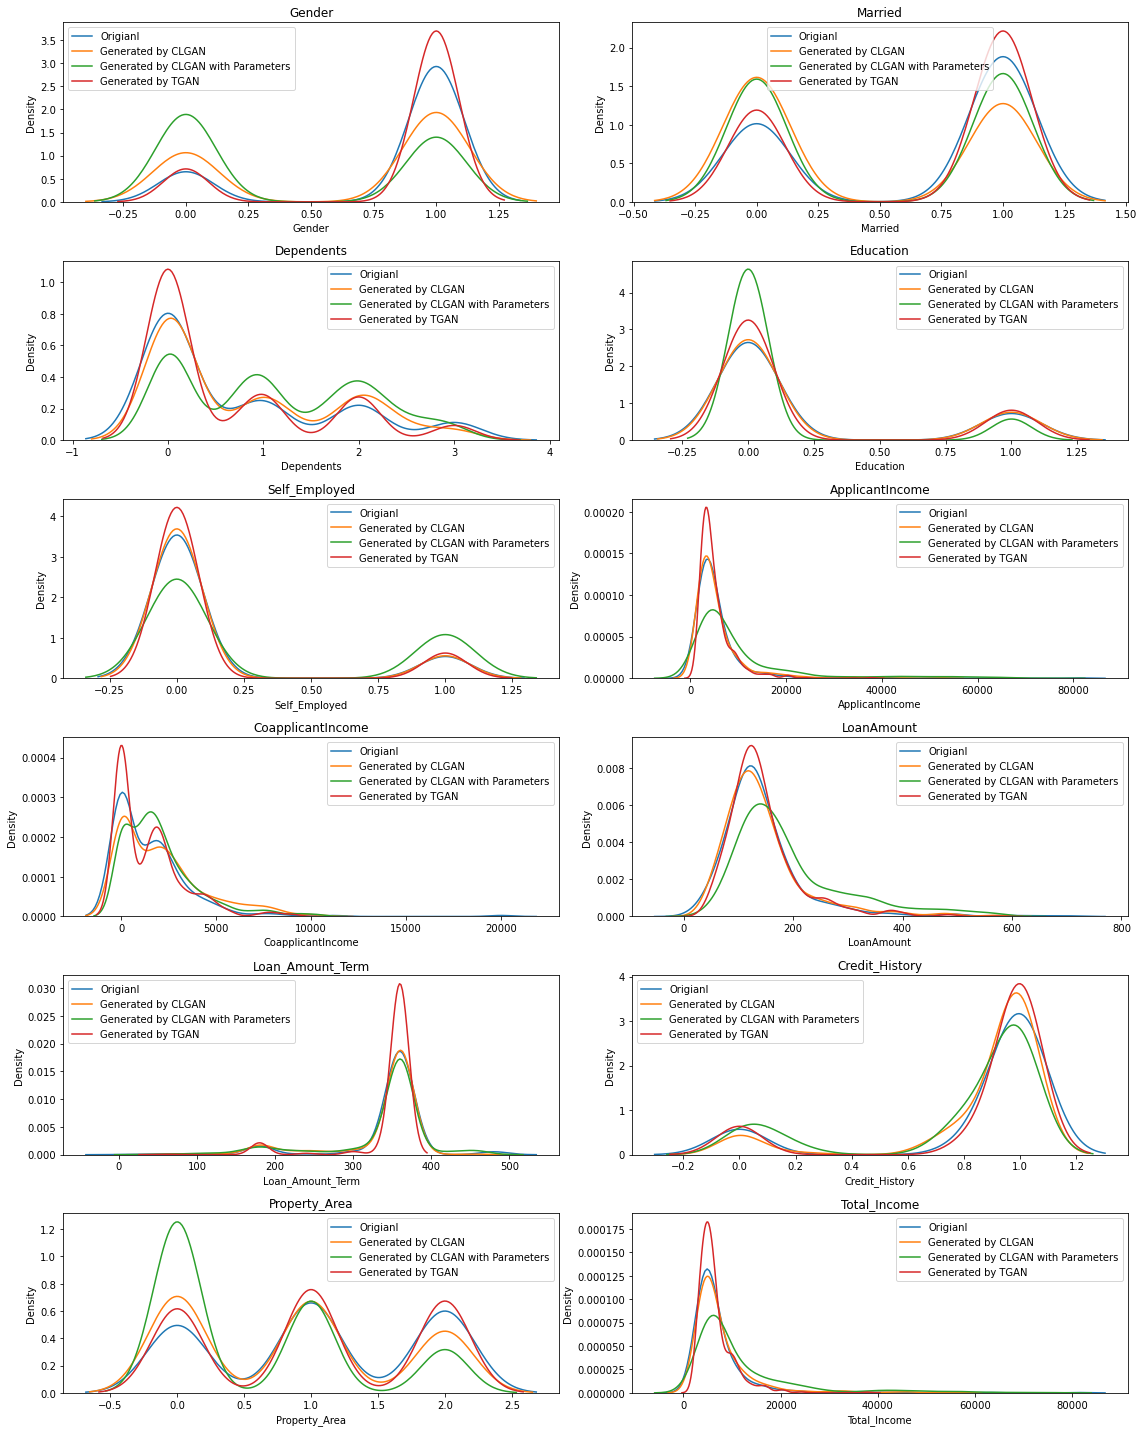

In [29]:
# plotting the distributions of original vs generated data

columns = X.columns

num_rows = len(columns) // 2

fig, axs = plt.subplots(num_rows, 2, figsize=(16, 20))

for ax, col in zip(axs.flatten(), columns):
    sns.kdeplot(X[col], ax=ax, label='Origianl')
    sns.kdeplot(clgan_test_x[col], ax=ax, label='Generated by CLGAN')
    sns.kdeplot(para_gan_test_x[col], ax=ax, label='Generated by CLGAN with Parameters')
    sns.kdeplot(tgan_test_x[col], ax=ax, label='Generated by TGAN')
    ax.set_title(col)
    ax.legend()

plt.tight_layout()

#### Analysis:
##### With this dataset, the performance of CLGAN actually dropped and TGAN performed really well. The distribution of all the datasets was quite similar though. 

In [30]:
#Compiling Model Results:
loan_results = pd.concat([org_results,
                                clgan_results,
                                para_ganresults,
                                tgan_results,
                                ], axis = 1, keys =['Original Data', 'CGan Generated Data', 'CGAN + Hyperparameters','TGAN'])
loan_results

Original Data                               \
                    Model Accuracy   ROC AUC  F1 Score   
0           XGBClassifier     0.79  0.723469  0.855172   
1  DecisionTreeClassifier     0.78  0.742871  0.840580   
2  RandomForestClassifier     0.87  0.799205  0.912752   
3      LogisticRegression     0.84  0.750818  0.894737   
4               LinearSVC     0.69  0.500000  0.816568   
5    KNeighborsClassifier     0.63  0.474287  0.767296   

      CGan Generated Data                                \
                    Model  Accuracy   ROC AUC  F1 Score   
0           XGBClassifier  0.737977  0.735896  0.791557   
1  DecisionTreeClassifier  0.771144  0.769533  0.809392   
2  RandomForestClassifier  0.719735  0.717446  0.781371   
3      LogisticRegression  0.615257  0.612288  0.717762   
4               LinearSVC  0.505804  0.501727  0.669623   
5    KNeighborsClassifier  0.588723  0.585807  0.696822   

   CGAN + Hyperparameters                                \
                    Model  Accuracy   ROC AUC  F1 Score   
0           XGBClassifier  0.568523  0.659587  0.568142   
1  DecisionTreeClassifier  0.626879  0.694471  0.595785   
2  RandomForestClassifier  0.552608  0.649517  0.560764   
3      LogisticRegression  0.517241  0.621452  0.539629   
4               LinearSVC  0.335986  0.509231  0.479556   
5    KNeighborsClassifier  0.467728  0.577728  0.507365   

                     TGAN                                
                    Model  Accuracy   ROC AUC  F1 Score  
0           XGBClassifier  1.000000  1.000000  1.000000  
1  DecisionTreeClassifier  1.000000  1.000000  1.000000  
2  RandomForestClassifier  1.000000  1.000000  1.000000  
3      LogisticRegression  0.814120  0.698175  0.881549  
4               LinearSVC  0.709562  0.500000  0.830110  
5    KNeighborsClassifier  0.774799  0.639570  0.858427

## Yacht Hydrodynamics Dataset (Regression)
Prediction of residuary resistance of sailing yachts at the initial design stage is of a great value for evaluating the ship as performance and for estimating the required propulsive power. Essential inputs include the basic hull dimensions and the boat velocity.
The Delft data set comprises 308 full-scale experiments, which were performed at the Delft Ship Hydromechanics Laboratory for that purpose.

In [31]:
# loading Dataset
df = pd.read_csv("yacht_hydro.csv")
print(df.shape)
df.head()

(308, 7)


,LC,PC,L/D,B/Dr,L/B,Fr,Rr
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18


In [32]:
# Split the DataFrame into input features (X) and target variable (y)
X = df.loc[:, df.columns != 'Rr']
y = df[['Rr']]

In [33]:
# create a StandardScaler model
scaler = StandardScaler()

# fit and transform the data
X_scaled = scaler.fit_transform(X)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# create a list of tuples containing the name of the model and the model itself
models = [
    ('XGBRegressor', xgb.XGBRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor()),
    ('RandomForestRegressor', RandomForestRegressor()),
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('KNeighborsRegressor', KNeighborsRegressor())
]

# create a dataframe to store the results
org_results = pd.DataFrame(columns=['Model', 'R-Squared', 'Adjusted R-Squared', 'RMSE'])

# fit each model to the transformed data and evaluate its performance
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    org_results = org_results.append({'Model': name, 'R-Squared': r2, 'Adjusted R-Squared': adj_r2, 'RMSE': rmse}, ignore_index=True)

# display the results
print(org_results)

                   Model  R-Squared  Adjusted R-Squared      RMSE
0           XGBRegressor   0.998776            0.998642  0.426529
1  DecisionTreeRegressor   0.998209            0.998014  0.515860
2  RandomForestRegressor   0.997751            0.997506  0.578026
3       LinearRegression   0.545030            0.495397  8.222082
4                  Ridge   0.546678            0.497224  8.207181
5                  Lasso   0.577893            0.531845  7.919572
6    KNeighborsRegressor   0.459539            0.400579  8.961335


In [34]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68)

# generating data using CLGAN
clgan_test_x, clgan_test_y = GANGenerator().generate_data_pipe(X_train, y_train, X_test, )
print(clgan_test_x.shape)

Fitting CTGAN transformers for each column:   0%|          | 0/7 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

(387, 6)


In [35]:
# create a StandardScaler model
scaler = StandardScaler()

# fit and transform the data
X_scaled = scaler.fit_transform(X)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=32)

# create a list of tuples containing the name of the model and the model itself
models = [
    ('XGBRegressor', xgb.XGBRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor()),
    ('RandomForestRegressor', RandomForestRegressor()),
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('KNeighborsRegressor', KNeighborsRegressor())
]

# create a dataframe to store the results
clgan_results = pd.DataFrame(columns=['Model', 'R-Squared', 'Adjusted R-Squared', 'RMSE'])

# fit each model to the transformed data and evaluate its performance
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(clgan_test_x)
    r2 = r2_score(clgan_test_y, y_pred)
    adj_r2 = 1 - (1-r2)*(len(clgan_test_y)-1)/(len(clgan_test_y)-clgan_test_x.shape[1]-1)
    rmse = sqrt(mean_squared_error(clgan_test_y, y_pred))
    clgan_results = clgan_results.append({'Model': name, 'R-Squared': r2, 'Adjusted R-Squared': adj_r2, 'RMSE': rmse}, ignore_index=True)

# display the results
print(clgan_results)

                   Model  R-Squared  Adjusted R-Squared       RMSE
0           XGBRegressor  -0.007510           -0.023418  16.689790
1  DecisionTreeRegressor  -0.019282           -0.035376  16.787010
2  RandomForestRegressor  -0.010130           -0.026079  16.711471
3       LinearRegression   0.063433            0.048645  16.091466
4                  Ridge   0.055240            0.040323  16.161695
5                  Lasso  -0.063915           -0.080714  17.150612
6    KNeighborsRegressor   0.052395            0.037432  16.186013


In [36]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68)

# generating data using CLGAN with Parameters
para_gan_test_x, para_gan_test_y  = GANGenerator(gen_x_times=4.1, cat_cols=None,
           bot_filter_quantile=0.001, top_filter_quantile=0.999, is_post_process=True,
           adversarial_model_params={
               "metrics": "AUC", "max_depth": 29, "max_bin": 1000, 
               "learning_rate": 1.02, "random_state": 42, "n_estimators": 500,
           }, pregeneration_frac=2, only_generated_data=False,
           gan_params = {"batch_size": 750, "patience": 200, "epochs" : 400,}).generate_data_pipe(X_train, y_train,
                                          X_test, deep_copy=True, only_adversarial=False, use_adversarial=True)
print(para_gan_test_x.shape)

Fitting CTGAN transformers for each column:   0%|          | 0/7 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/400 [00:00<?, ?it/s]

(879, 6)


In [37]:
# create a StandardScaler model
scaler = StandardScaler()

# fit and transform the data
X_scaled = scaler.fit_transform(X)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=32)

# create a list of tuples containing the name of the model and the model itself
models = [
    ('XGBRegressor', xgb.XGBRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor()),
    ('RandomForestRegressor', RandomForestRegressor()),
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('KNeighborsRegressor', KNeighborsRegressor())
]

# create a dataframe to store the results
para_ganresults = pd.DataFrame(columns=['Model', 'R-Squared', 'Adjusted R-Squared', 'RMSE'])

# fit each model to the transformed data and evaluate its performance
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(para_gan_test_x)
    r2 = r2_score(para_gan_test_y, y_pred)
    adj_r2 = 1 - (1-r2)*(len(para_gan_test_y)-1)/(len(para_gan_test_y)-para_gan_test_x.shape[1]-1)
    rmse = np.sqrt(mean_squared_error(para_gan_test_y, y_pred))
    para_ganresults = para_ganresults.append({'Model': name, 'R-Squared': r2, 'Adjusted R-Squared': adj_r2, 'RMSE': rmse}, ignore_index=True)

# display the results
print(para_ganresults)

                   Model  R-Squared  Adjusted R-Squared       RMSE
0           XGBRegressor  -0.018480           -0.025488  14.683378
1  DecisionTreeRegressor  -0.013723           -0.020698  14.649044
2  RandomForestRegressor  -0.020856           -0.027880  14.700492
3       LinearRegression  -0.145978           -0.153863  15.575352
4                  Ridge  -0.214060           -0.222414  16.031339
5                  Lasso  -0.578527           -0.589388  18.279977
6    KNeighborsRegressor  -0.021797           -0.028827  14.707265


In [38]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68)

# generating data using TGAN
tgan_test_x, tgan_test_y = OriginalGenerator().generate_data_pipe(X_train, y_train, X_test, )
print(tgan_test_x.shape)

(738, 6)


In [39]:
# create a StandardScaler model
scaler = StandardScaler()

# fit and transform the data
X_scaled = scaler.fit_transform(X)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=32)

# create a list of tuples containing the name of the model and the model itself
models = [
    ('XGBRegressor', xgb.XGBRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor()),
    ('RandomForestRegressor', RandomForestRegressor()),
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('KNeighborsRegressor', KNeighborsRegressor())
]

# create a dataframe to store the results
tgan_results = pd.DataFrame(columns=['Model', 'R-Squared', 'Adjusted R-Squared', 'RMSE'])

# fit each model to the transformed data and evaluate its performance
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(tgan_test_x)
    r2 = r2_score(tgan_test_y, y_pred)
    adj_r2 = 1 - (1-r2)*(len(tgan_test_y)-1)/(len(tgan_test_y)-tgan_test_x.shape[1]-1)
    rmse = sqrt(mean_squared_error(tgan_test_y, y_pred))
    tgan_results = tgan_results.append({'Model': name, 'R-Squared': r2, 'Adjusted R-Squared': adj_r2, 'RMSE': rmse}, ignore_index=True)

# display the results
print(tgan_results)

                   Model  R-Squared  Adjusted R-Squared       RMSE
0           XGBRegressor  -0.081623           -0.090501  15.214729
1  DecisionTreeRegressor  -0.104322           -0.113386  15.373552
2  RandomForestRegressor  -0.091803           -0.100764  15.286159
3       LinearRegression   0.112663            0.105380  13.780680
4                  Ridge   0.128858            0.121708  13.654343
5                  Lasso   0.070899            0.063273  14.101255
6    KNeighborsRegressor   0.053068            0.045296  14.235926


### Distribution plot for original vs all the generated data

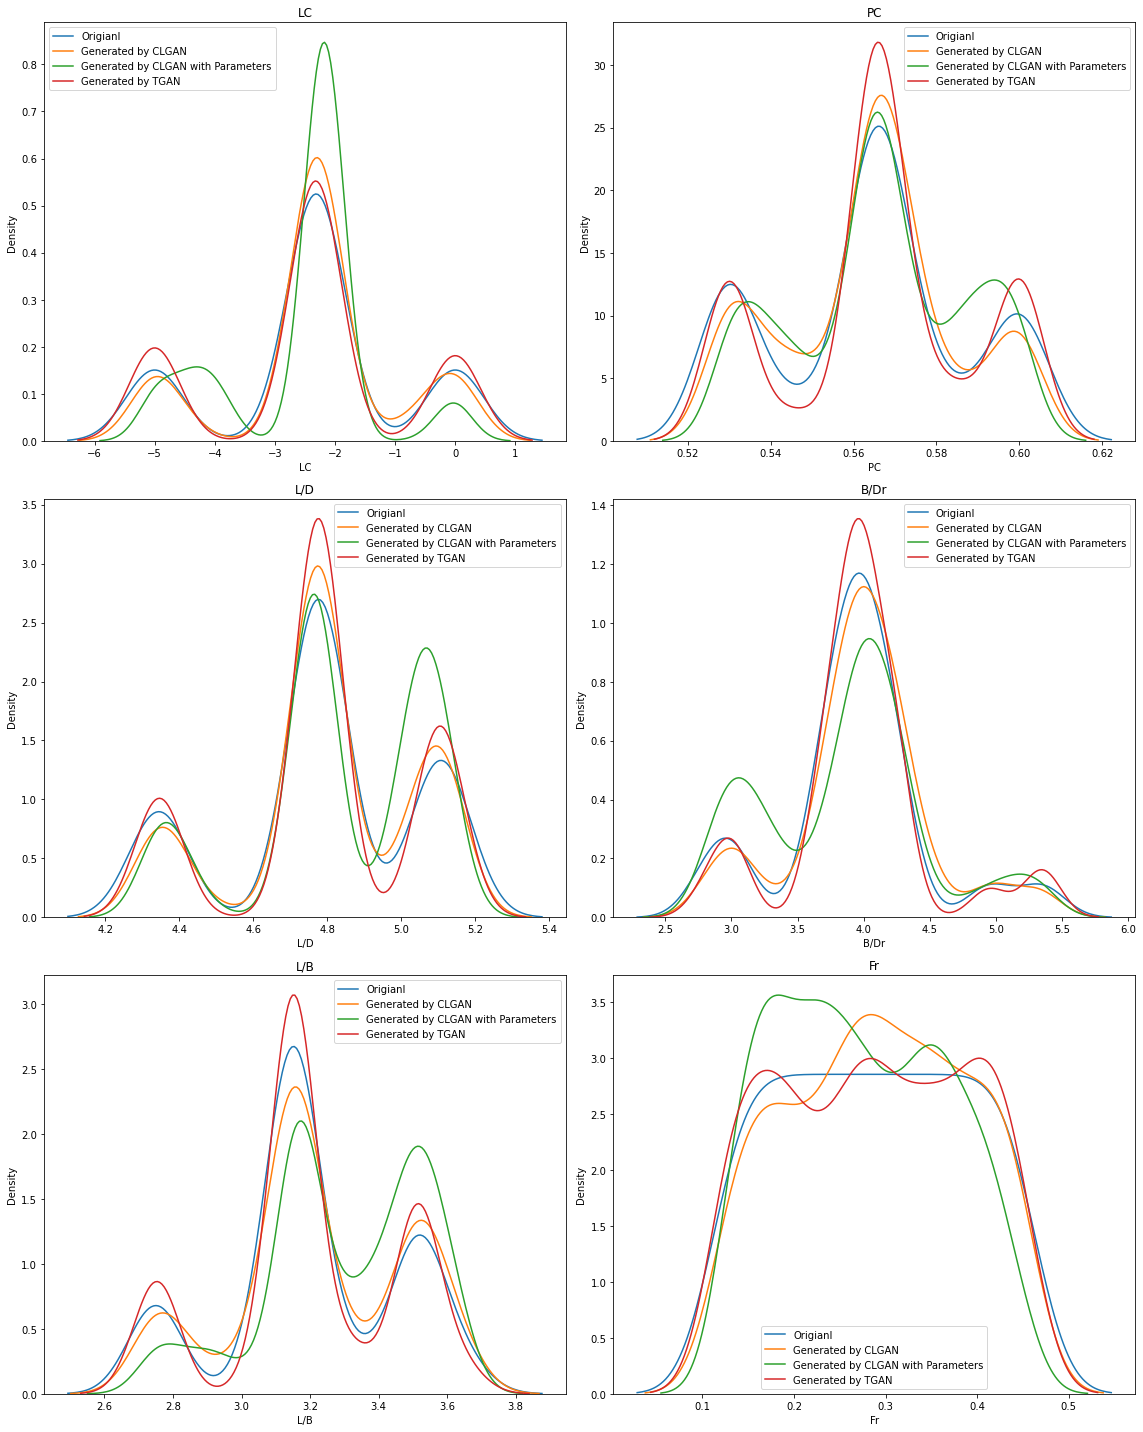

In [40]:
# plotting the distributions of original vs generated data

columns = X.columns

num_rows = len(columns) // 2

fig, axs = plt.subplots(num_rows, 2, figsize=(16, 20))

for ax, col in zip(axs.flatten(), columns):
    sns.kdeplot(X[col], ax=ax, label='Origianl')
    sns.kdeplot(clgan_test_x[col], ax=ax, label='Generated by CLGAN')
    sns.kdeplot(para_gan_test_x[col], ax=ax, label='Generated by CLGAN with Parameters')
    sns.kdeplot(tgan_test_x[col], ax=ax, label='Generated by TGAN')
    ax.set_title(col)
    ax.legend()

plt.tight_layout()

#### Analysis:
##### The regressions models did not perform well at all on the generated data but the distribution was very close

In [41]:
#Compiling Model Results:
yacht_results = pd.concat([org_results,
                                clgan_results,
                                para_ganresults,
                                tgan_results,
                                ], axis = 1, keys =['Original Data', 'CGan Generated Data', 'CGAN + Hyperparameters','TGAN'])
yacht_results

Original Data                                         \
                   Model R-Squared Adjusted R-Squared      RMSE   
0           XGBRegressor  0.998776           0.998642  0.426529   
1  DecisionTreeRegressor  0.998209           0.998014  0.515860   
2  RandomForestRegressor  0.997751           0.997506  0.578026   
3       LinearRegression  0.545030           0.495397  8.222082   
4                  Ridge  0.546678           0.497224  8.207181   
5                  Lasso  0.577893           0.531845  7.919572   
6    KNeighborsRegressor  0.459539           0.400579  8.961335   

     CGan Generated Data                                          \
                   Model R-Squared Adjusted R-Squared       RMSE   
0           XGBRegressor -0.007510          -0.023418  16.689790   
1  DecisionTreeRegressor -0.019282          -0.035376  16.787010   
2  RandomForestRegressor -0.010130          -0.026079  16.711471   
3       LinearRegression  0.063433           0.048645  16.091466   
4                  Ridge  0.055240           0.040323  16.161695   
5                  Lasso -0.063915          -0.080714  17.150612   
6    KNeighborsRegressor  0.052395           0.037432  16.186013   

  CGAN + Hyperparameters                                          \
                   Model R-Squared Adjusted R-Squared       RMSE   
0           XGBRegressor -0.018480          -0.025488  14.683378   
1  DecisionTreeRegressor -0.013723          -0.020698  14.649044   
2  RandomForestRegressor -0.020856          -0.027880  14.700492   
3       LinearRegression -0.145978          -0.153863  15.575352   
4                  Ridge -0.214060          -0.222414  16.031339   
5                  Lasso -0.578527          -0.589388  18.279977   
6    KNeighborsRegressor -0.021797          -0.028827  14.707265   

                    TGAN                                          
                   Model R-Squared Adjusted R-Squared       RMSE  
0           XGBRegressor -0.081623          -0.090501  15.214729  
1  DecisionTreeRegressor -0.104322          -0.113386  15.373552  
2  RandomForestRegressor -0.091803          -0.100764  15.286159  
3       LinearRegression  0.112663           0.105380  13.780680  
4                  Ridge  0.128858           0.121708  13.654343  
5                  Lasso  0.070899           0.063273  14.101255  
6    KNeighborsRegressor  0.053068           0.045296  14.235926

## Credit Card Dataset (Classification)
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients<br>
This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients.

In [42]:
# loading dataset
df = pd.read_csv("default of credit card clients.csv")
print(df.shape)
df.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [43]:
# Dropping unimpactful colums
df.drop('ID',axis=1,inplace=True)

In [44]:
# sampling data to reduce the size
df = df.sample(n=5000, replace=True)

In [45]:
df[df.index.duplicated()]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
20650,20000,1,2,2,25,0,0,-1,0,0,...,4426,1906,942,5006,5000,2000,0,900,0,0
23717,90000,2,3,1,53,0,0,0,0,0,...,78994,50095,48987,3200,4000,2602,2000,3000,2000,1
27979,160000,2,1,2,28,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
4243,80000,1,3,2,66,0,0,0,0,0,...,15159,12195,0,2912,3000,3000,3000,0,0,0
28273,230000,2,1,2,31,-2,-2,-2,-2,-2,...,147,0,0,6792,0,147,0,0,176,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13999,280000,2,2,1,27,-2,-2,-2,-2,-2,...,922,107,980,0,5737,922,107,980,648,0
10965,80000,1,2,2,36,0,0,0,0,0,...,34384,29340,21985,3007,1503,2017,1024,1017,2000,0
18000,160000,1,2,2,37,1,2,2,0,0,...,90457,90588,92533,4300,0,4200,3238,3400,3550,1
1791,200000,2,1,2,26,0,0,0,0,0,...,14973,20542,15810,1502,1200,300,7000,8000,4000,0


In [46]:
df=df.loc[~df.index.duplicated(), :]

In [47]:
# Split the DataFrame into input features (X) and target variable (y)
X = df.loc[:, df.columns != 'default payment next month']
y = df[['default payment next month']]

In [48]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a list of tuples containing the name of the model and the model itself
models = [
    ('XGBClassifier', xgb.XGBClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('LogisticRegression', LogisticRegression()),
    ('LinearSVC', LinearSVC()),
    ('KNeighborsClassifier', KNeighborsClassifier())
]

# create a dataframe to store the results
org_results = pd.DataFrame(columns=['Model', 'Accuracy', 'ROC AUC', 'F1 Score'])

# fit each model to the transformed data and evaluate its performance
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    org_results = org_results.append({'Model': name, 'Accuracy': acc, 'ROC AUC': roc, 'F1 Score': f1}, ignore_index=True)

# display the results
print(org_results)

                    Model  Accuracy   ROC AUC  F1 Score
0           XGBClassifier  0.805223  0.639853  0.431746
1  DecisionTreeClassifier  0.704026  0.593578  0.361502
2  RandomForestClassifier  0.801959  0.631958  0.416667
3      LogisticRegression  0.792165  0.501260  0.010363
4               LinearSVC  0.684440  0.538427  0.275000
5    KNeighborsClassifier  0.757345  0.559086  0.273616


In [49]:
# generating data using CLGAN
clgan_test_x, clgan_test_y = GANGenerator().generate_data_pipe(X_train, y_train, X_test, )
print(clgan_test_x.shape)

Fitting CTGAN transformers for each column:   0%|          | 0/24 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

(4219, 23)


In [50]:
# create a list of tuples containing the name of the model and the model itself
models = [
    ('XGBClassifier', xgb.XGBClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('LogisticRegression', LogisticRegression()),
    ('LinearSVC', LinearSVC()),
    ('KNeighborsClassifier', KNeighborsClassifier())
]

# create a dataframe to store the results
clgan_results = pd.DataFrame(columns=['Model', 'Accuracy', 'ROC AUC', 'F1 Score'])

# fit each model to the transformed data and evaluate its performance
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(clgan_test_x)
    acc = accuracy_score(clgan_test_y, y_pred)
    roc = roc_auc_score(clgan_test_y, y_pred)
    f1 = f1_score(clgan_test_y, y_pred)
    clgan_results = clgan_results.append({'Model': name, 'Accuracy': acc, 'ROC AUC': roc, 'F1 Score': f1}, ignore_index=True)

# display the results
print(clgan_results)

                    Model  Accuracy   ROC AUC  F1 Score
0           XGBClassifier  0.945248  0.901307  0.870298
1  DecisionTreeClassifier  0.928182  0.925057  0.851252
2  RandomForestClassifier  0.951884  0.924461  0.890448
3      LogisticRegression  0.771273  0.498908  0.012282
4               LinearSVC  0.764162  0.500371  0.042348
5    KNeighborsClassifier  0.800664  0.609590  0.371919


In [51]:
# generating data using CLGAN with parameters
para_gan_test_x, para_gan_test_y  = GANGenerator(gen_x_times=4.1, cat_cols=None,
           bot_filter_quantile=0.001, top_filter_quantile=0.999, is_post_process=True,
           adversarial_model_params={
               "metrics": "AUC", "max_depth": 29, "max_bin": 1000, 
               "learning_rate": 1.02, "random_state": 42, "n_estimators": 500,
           }, pregeneration_frac=2, only_generated_data=False,
           gan_params = {"batch_size": 750, "patience": 200, "epochs" : 400,}).generate_data_pipe(X_train, y_train,
                                          X_test, deep_copy=True, only_adversarial=False, use_adversarial=True)
print(para_gan_test_x.shape)                                          

Fitting CTGAN transformers for each column:   0%|          | 0/24 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/400 [00:00<?, ?it/s]

(4166, 23)


In [52]:
# create a list of tuples containing the name of the model and the model itself
models = [
    ('XGBClassifier', xgb.XGBClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('LogisticRegression', LogisticRegression()),
    ('LinearSVC', LinearSVC()),
    ('KNeighborsClassifier', KNeighborsClassifier())
]

# create a dataframe to store the results
para_ganresults = pd.DataFrame(columns=['Model', 'Accuracy', 'ROC AUC', 'F1 Score'])

# fit each model to the transformed data and evaluate its performance
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(para_gan_test_x)
    acc = accuracy_score(para_gan_test_y, y_pred)
    roc = roc_auc_score(para_gan_test_y, y_pred)
    f1 = f1_score(para_gan_test_y, y_pred)
    para_ganresults = para_ganresults.append({'Model': name, 'Accuracy': acc, 'ROC AUC': roc, 'F1 Score': f1}, ignore_index=True)

# display the results
print(para_ganresults)

                    Model  Accuracy   ROC AUC  F1 Score
0           XGBClassifier  0.954393  0.918860  0.889535
1  DecisionTreeClassifier  0.935190  0.929439  0.858787
2  RandomForestClassifier  0.965434  0.940544  0.917526
3      LogisticRegression  0.776764  0.501676  0.037267
4               LinearSVC  0.365098  0.527129  0.353775
5    KNeighborsClassifier  0.805809  0.613804  0.380077


In [53]:
# generating data using TGAN
tgan_test_x, tgan_test_y = OriginalGenerator().generate_data_pipe(X_train, y_train, X_test, )
print(tgan_test_x.shape)

(10633, 23)


In [54]:
# create a list of tuples containing the name of the model and the model itself
models = [
    ('XGBClassifier', xgb.XGBClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('LogisticRegression', LogisticRegression()),
    ('LinearSVC', LinearSVC()),
    ('KNeighborsClassifier', KNeighborsClassifier())
]

# create a dataframe to store the results
tgan_results = pd.DataFrame(columns=['Model', 'Accuracy', 'ROC AUC', 'F1 Score'])

# fit each model to the transformed data and evaluate its performance
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(tgan_test_x)
    acc = accuracy_score(tgan_test_y, y_pred)
    roc = roc_auc_score(tgan_test_y, y_pred)
    f1 = f1_score(tgan_test_y, y_pred)
    tgan_results = tgan_results.append({'Model': name, 'Accuracy': acc, 'ROC AUC': roc, 'F1 Score': f1}, ignore_index=True)

# display the results
print(tgan_results)

                    Model  Accuracy   ROC AUC  F1 Score
0           XGBClassifier  0.987774  0.974029  0.973063
1  DecisionTreeClassifier  0.999530  0.998990  0.998989
2  RandomForestClassifier  0.999530  0.998990  0.998989
3      LogisticRegression  0.766106  0.500310  0.005598
4               LinearSVC  0.496191  0.557009  0.382763
5    KNeighborsClassifier  0.798458  0.622799  0.404557


### Distribution plot for original vs all the generated data

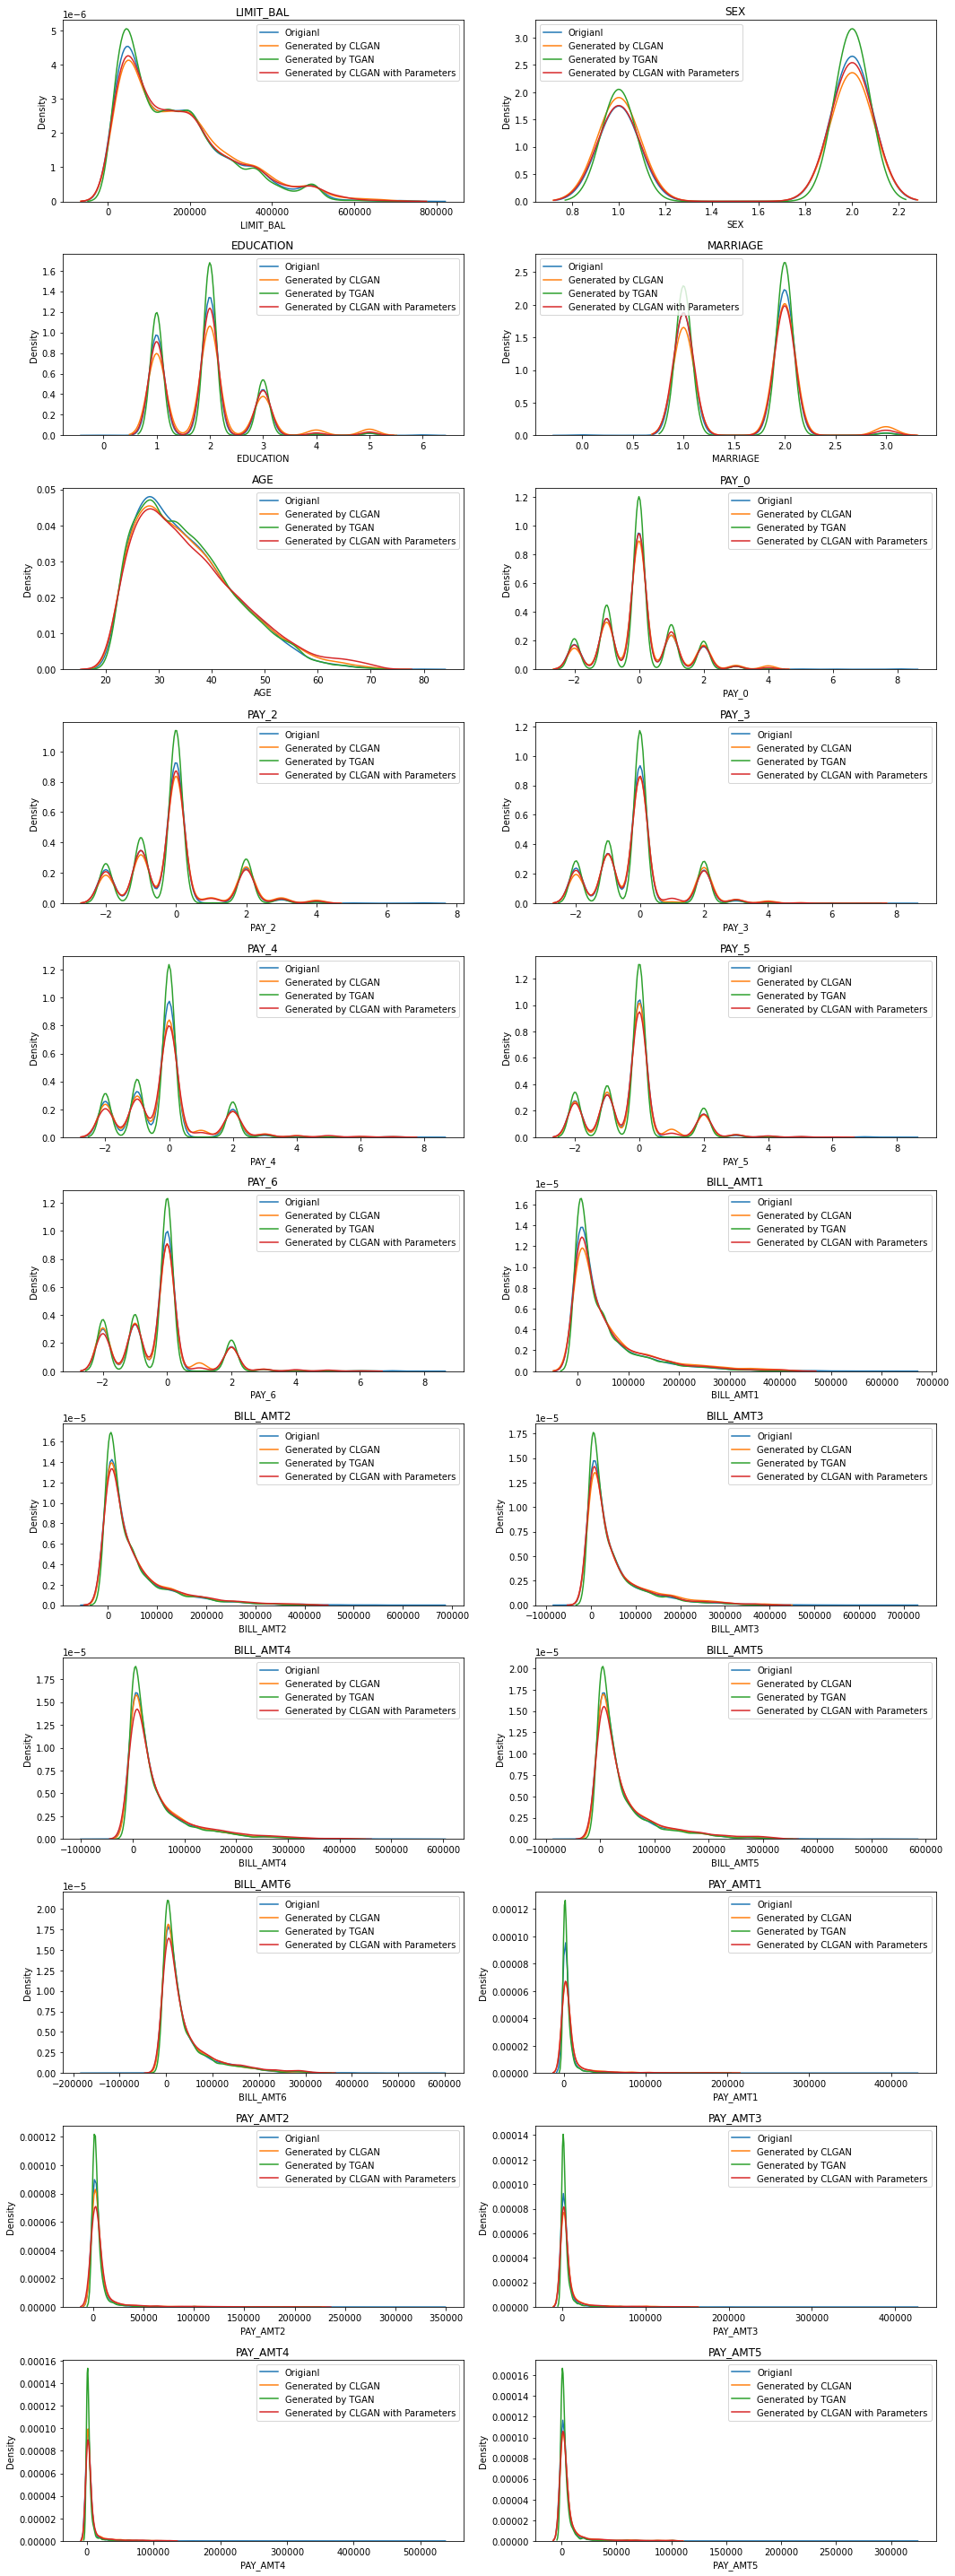

In [55]:
# plotting the distributions of original vs generated data

columns = X.columns

num_rows = len(columns) // 2

fig, axs = plt.subplots(num_rows, 2, figsize=(15, 40))

for ax, col in zip(axs.flatten(), columns):
    sns.kdeplot(X[col], ax=ax, label='Origianl')
    sns.kdeplot(clgan_test_x[col], ax=ax, label='Generated by CLGAN')
    sns.kdeplot(tgan_test_x[col], ax=ax, label='Generated by TGAN')
    sns.kdeplot(para_gan_test_x[col], ax=ax, label='Generated by CLGAN with Parameters')
    ax.set_title(col)
    ax.legend()

plt.tight_layout()

#### Analysis:
##### The performance of generated data was improved a lot and TGAN was the performer. The distributions of all the data can be seen as very closeto each other

In [56]:
#Compiling Model Results:
creditcard_results = pd.concat([org_results,
                                clgan_results,
                                para_ganresults,
                                tgan_results,
                                ], axis = 1, keys =['Original Data', 'CGan Generated Data', 'CGAN + Hyperparameters','TGAN'])
creditcard_results

Original Data                                \
                    Model  Accuracy   ROC AUC  F1 Score   
0           XGBClassifier  0.805223  0.639853  0.431746   
1  DecisionTreeClassifier  0.704026  0.593578  0.361502   
2  RandomForestClassifier  0.801959  0.631958  0.416667   
3      LogisticRegression  0.792165  0.501260  0.010363   
4               LinearSVC  0.684440  0.538427  0.275000   
5    KNeighborsClassifier  0.757345  0.559086  0.273616   

      CGan Generated Data                                \
                    Model  Accuracy   ROC AUC  F1 Score   
0           XGBClassifier  0.945248  0.901307  0.870298   
1  DecisionTreeClassifier  0.928182  0.925057  0.851252   
2  RandomForestClassifier  0.951884  0.924461  0.890448   
3      LogisticRegression  0.771273  0.498908  0.012282   
4               LinearSVC  0.764162  0.500371  0.042348   
5    KNeighborsClassifier  0.800664  0.609590  0.371919   

   CGAN + Hyperparameters                                \
                    Model  Accuracy   ROC AUC  F1 Score   
0           XGBClassifier  0.954393  0.918860  0.889535   
1  DecisionTreeClassifier  0.935190  0.929439  0.858787   
2  RandomForestClassifier  0.965434  0.940544  0.917526   
3      LogisticRegression  0.776764  0.501676  0.037267   
4               LinearSVC  0.365098  0.527129  0.353775   
5    KNeighborsClassifier  0.805809  0.613804  0.380077   

                     TGAN                                
                    Model  Accuracy   ROC AUC  F1 Score  
0           XGBClassifier  0.987774  0.974029  0.973063  
1  DecisionTreeClassifier  0.999530  0.998990  0.998989  
2  RandomForestClassifier  0.999530  0.998990  0.998989  
3      LogisticRegression  0.766106  0.500310  0.005598  
4               LinearSVC  0.496191  0.557009  0.382763  
5    KNeighborsClassifier  0.798458  0.622799  0.404557

## Wine Quality Dataset (Regression)
https://archive.ics.uci.edu/ml/datasets/wine+quality

In [57]:
# loading dataset
df = pd.read_csv("winequality-red.csv", sep = ';')
print(df.shape)
df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [58]:
# Split the DataFrame into input features (X) and target variable (y)
X = df.loc[:, df.columns != 'quality']
y = df[['quality']]

In [59]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a list of tuples containing the name of the model and the model itself
models = [
    ('XGBRegressor', xgb.XGBRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor()),
    ('RandomForestRegressor', RandomForestRegressor()),
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('KNeighborsRegressor', KNeighborsRegressor())
]

# create a dataframe to store the results
org_results = pd.DataFrame(columns=['Model', 'R-Squared', 'Adjusted R-Squared', 'RMSE'])

# fit each model to the transformed data and evaluate its performance
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    org_results = org_results.append({'Model': name, 'R-Squared': r2, 'Adjusted R-Squared': adj_r2, 'RMSE': rmse}, ignore_index=True)

# display the results
print(org_results)

                   Model  R-Squared  Adjusted R-Squared      RMSE
0           XGBRegressor   0.489980            0.471765  0.577322
1  DecisionTreeRegressor   0.077093            0.044132  0.776611
2  RandomForestRegressor   0.512115            0.494691  0.564655
3       LinearRegression   0.403180            0.381865  0.624520
4                  Ridge   0.398706            0.377232  0.626856
5                  Lasso   0.009015           -0.026378  0.804745
6    KNeighborsRegressor   0.185929            0.156855  0.729383


In [60]:
# generating data using CLGAN
clgan_test_x, clgan_test_y = GANGenerator().generate_data_pipe(X_train, y_train, X_test, )
print(clgan_test_x.shape)

Fitting CTGAN transformers for each column:   0%|          | 0/12 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

(2556, 11)


In [61]:
# create a list of tuples containing the name of the model and the model itself
models = [
    ('XGBRegressor', xgb.XGBRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor()),
    ('RandomForestRegressor', RandomForestRegressor()),
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('KNeighborsRegressor', KNeighborsRegressor())
]

# create a dataframe to store the results
clgan_results = pd.DataFrame(columns=['Model', 'R-Squared', 'Adjusted R-Squared', 'RMSE'])

# fit each model to the transformed data and evaluate its performance
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(clgan_test_x)
    r2 = r2_score(clgan_test_y, y_pred)
    adj_r2 = 1 - (1-r2)*(len(clgan_test_y)-1)/(len(clgan_test_y)-clgan_test_x.shape[1]-1)
    rmse = np.sqrt(mean_squared_error(clgan_test_y, y_pred))
    clgan_results = clgan_results.append({'Model': name, 'R-Squared': r2, 'Adjusted R-Squared': adj_r2, 'RMSE': rmse}, ignore_index=True)

# display the results
print(clgan_results)

                   Model  R-Squared  Adjusted R-Squared      RMSE
0           XGBRegressor  -0.035751           -0.040230  1.412329
1  DecisionTreeRegressor  -0.220135           -0.225411  1.532894
2  RandomForestRegressor  -0.064322           -0.068924  1.431676
3       LinearRegression  -0.172336           -0.177405  1.502569
4                  Ridge  -0.189976           -0.195122  1.513831
5                  Lasso  -0.111433           -0.116238  1.463019
6    KNeighborsRegressor  -0.097390           -0.102135  1.453747


In [62]:
# generating data using CLGAN wiht parameters
para_gan_test_x, para_gan_test_y  = GANGenerator(gen_x_times=4.1, cat_cols=None,
           bot_filter_quantile=0.001, top_filter_quantile=0.999, is_post_process=True,
           adversarial_model_params={
               "metrics": "RMSE", "max_depth": 20, "max_bin": 1000, 
               "learning_rate": 1.02, "random_state": 42, "n_estimators": 500,
           }, pregeneration_frac=2, only_generated_data=False,
           gan_params = {"batch_size": 750, "patience": 1000, "epochs" : 800,}).generate_data_pipe(X_train, y_train,
                                          X_test, deep_copy=True, only_adversarial=False, use_adversarial=True)
print(para_gan_test_x.shape)        

Fitting CTGAN transformers for each column:   0%|          | 0/12 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/800 [00:00<?, ?it/s]

(6586, 11)


In [63]:
# create a list of tuples containing the name of the model and the model itself
models = [
    ('XGBRegressor', xgb.XGBRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor()),
    ('RandomForestRegressor', RandomForestRegressor()),
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('KNeighborsRegressor', KNeighborsRegressor())
]

# create a dataframe to store the results
para_ganresults = pd.DataFrame(columns=['Model', 'R-Squared', 'Adjusted R-Squared', 'RMSE'])

# fit each model to the transformed data and evaluate its performance
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(para_gan_test_x)
    r2 = r2_score(para_gan_test_y, y_pred)
    adj_r2 = 1 - (1-r2)*(len(para_gan_test_y)-1)/(len(para_gan_test_y)-para_gan_test_x.shape[1]-1)
    rmse = np.sqrt(mean_squared_error(para_gan_test_y, y_pred))
    para_ganresults = para_ganresults.append({'Model': name, 'R-Squared': r2, 'Adjusted R-Squared': adj_r2, 'RMSE': rmse}, ignore_index=True)

# display the results
print(para_ganresults)

                   Model  R-Squared  Adjusted R-Squared      RMSE
0           XGBRegressor  -0.092310           -0.094137  1.473957
1  DecisionTreeRegressor  -0.359470           -0.361745  1.644359
2  RandomForestRegressor  -0.074995           -0.076794  1.462228
3       LinearRegression  -0.106039           -0.107890  1.483191
4                  Ridge  -0.107474           -0.109327  1.484153
5                  Lasso  -0.019965           -0.021672  1.424310
6    KNeighborsRegressor  -0.048734           -0.050489  1.444257


In [64]:
# generating data usign TGAN
tgan_test_x, tgan_test_y = OriginalGenerator().generate_data_pipe(X_train, y_train, X_test, )
print(tgan_test_x.shape)

(3652, 11)


In [66]:
# create a list of tuples containing the name of the model and the model itself
models = [
    ('XGBRegressor', xgb.XGBRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor()),
    ('RandomForestRegressor', RandomForestRegressor()),
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('KNeighborsRegressor', KNeighborsRegressor())
]

# create a dataframe to store the results
tgan_results = pd.DataFrame(columns=['Model', 'R-Squared', 'Adjusted R-Squared', 'RMSE'])

# fit each model to the transformed data and evaluate its performance
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(tgan_test_x)
    r2 = r2_score(tgan_test_y, y_pred)
    adj_r2 = 1 - (1-r2)*(len(tgan_test_y)-1)/(len(tgan_test_y)-tgan_test_x.shape[1]-1)
    rmse = np.sqrt(mean_squared_error(tgan_test_y, y_pred))
    tgan_results = tgan_results.append({'Model': name, 'R-Squared': r2, 'Adjusted R-Squared': adj_r2, 'RMSE': rmse}, ignore_index=True)

# display the results
print(tgan_results)

                   Model  R-Squared  Adjusted R-Squared      RMSE
0           XGBRegressor   0.997428            0.997420  0.040463
1  DecisionTreeRegressor   1.000000            1.000000  0.000000
2  RandomForestRegressor   0.926479            0.926257  0.216331
3       LinearRegression   0.370952            0.369051  0.632785
4                  Ridge   0.370063            0.368160  0.633232
5                  Lasso   0.054408            0.051550  0.775829
6    KNeighborsRegressor   0.451515            0.449857  0.590876


### Distribution plot for original vs all the generated data

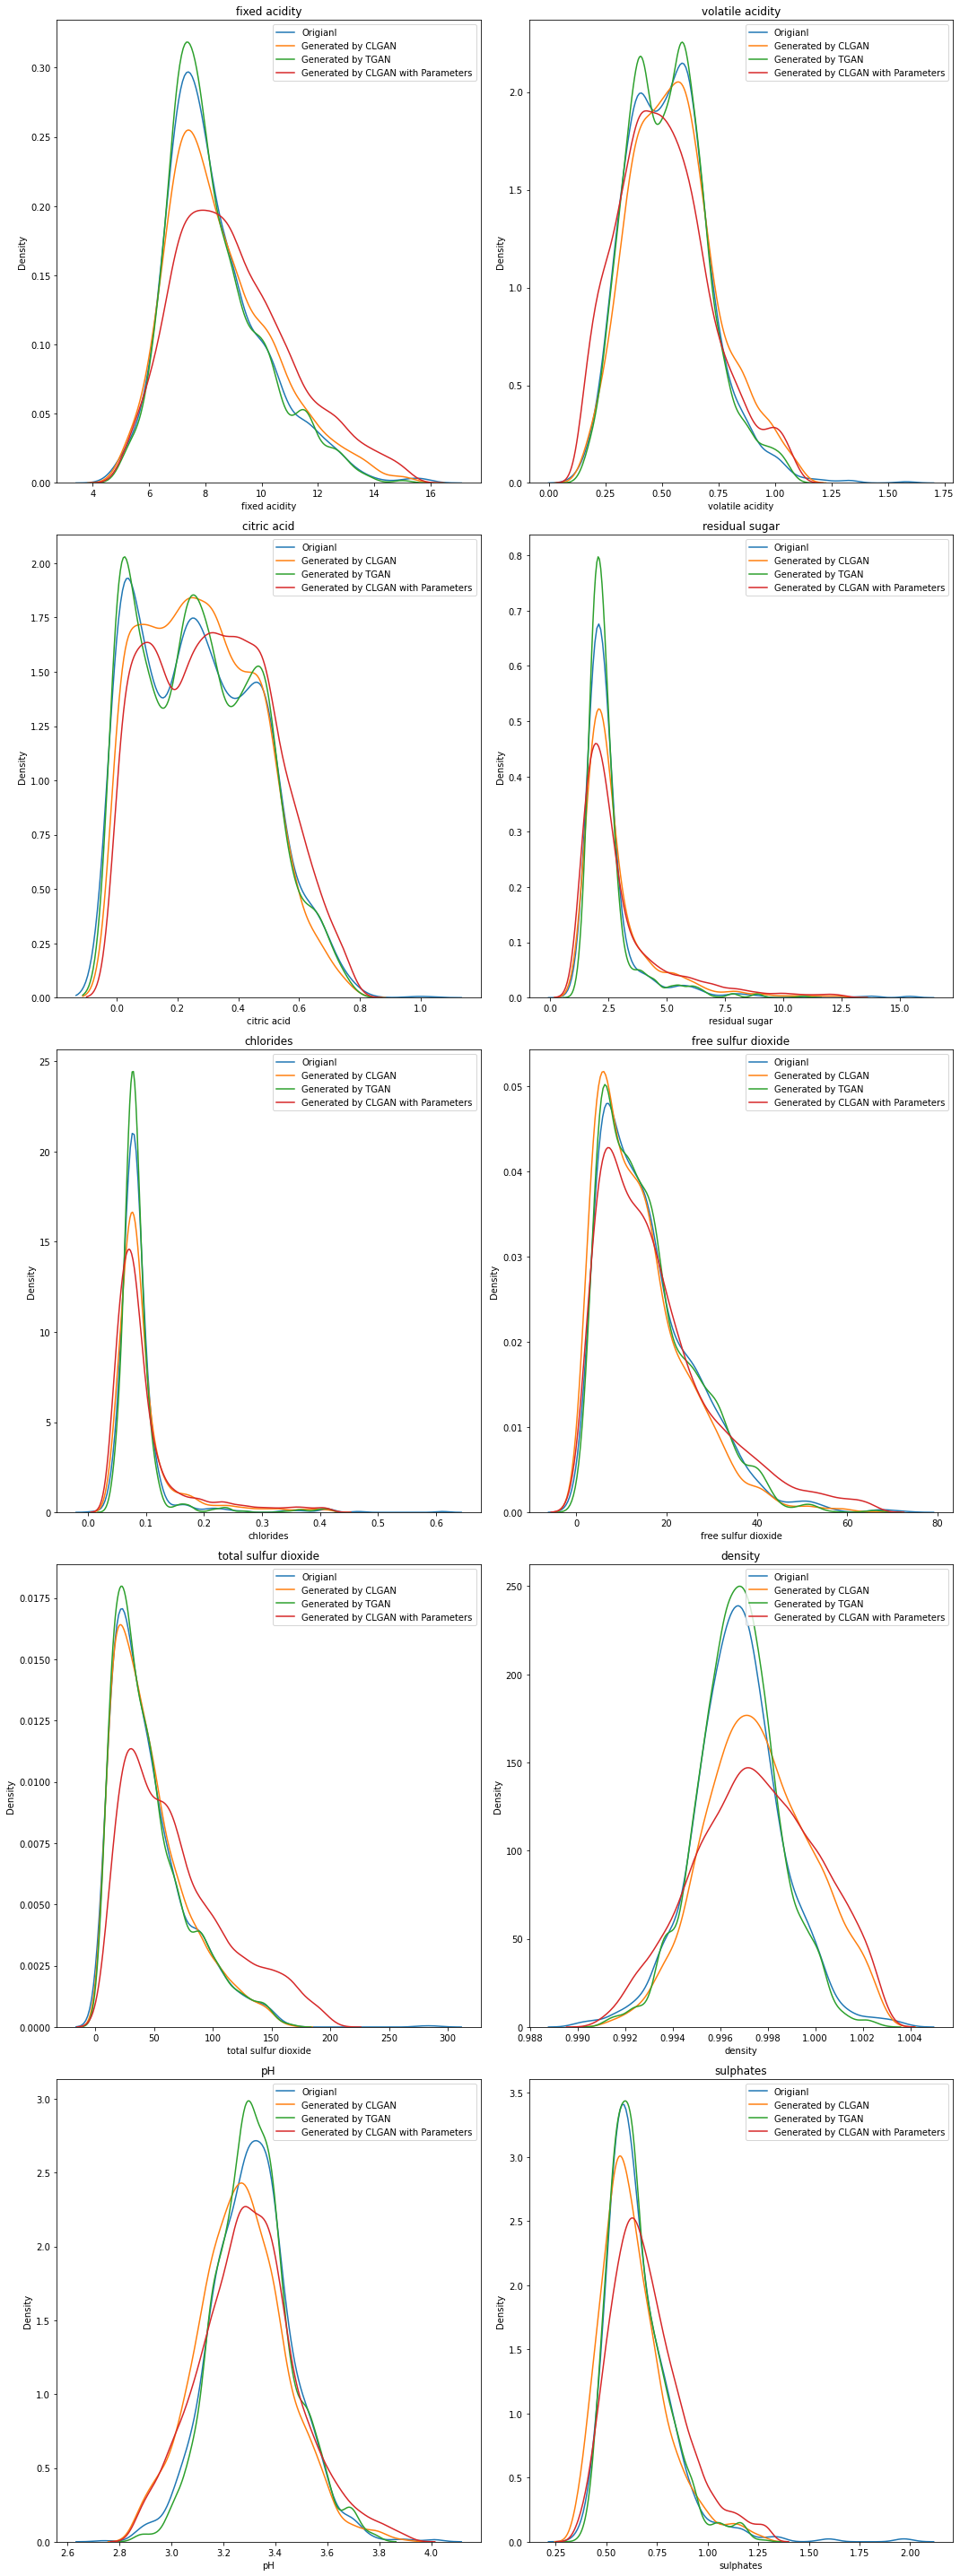

In [67]:
# plotting the distributions of original vs generated data

columns = X.columns

num_rows = len(columns) // 2

fig, axs = plt.subplots(num_rows, 2, figsize=(15, 40))

for ax, col in zip(axs.flatten(), columns):
    sns.kdeplot(X[col], ax=ax, label='Origianl')
    sns.kdeplot(clgan_test_x[col], ax=ax, label='Generated by CLGAN')
    sns.kdeplot(tgan_test_x[col], ax=ax, label='Generated by TGAN')
    sns.kdeplot(para_gan_test_x[col], ax=ax, label='Generated by CLGAN with Parameters')
    ax.set_title(col)
    ax.legend()

plt.tight_layout()

#### Analysis:
##### TGAN is the winner again, giving way better results than the original data. While CLGAN was performing very poorly, giving negative R2

In [68]:
#Compiling Model Results:
wine_results = pd.concat([org_results,
                                clgan_results,
                                para_ganresults,
                                tgan_results,
                                ], axis = 1, keys =['Original Data', 'CGan Generated Data', 'CGAN + Hyperparameters','TGAN'])
wine_results

Original Data                                         \
                   Model R-Squared Adjusted R-Squared      RMSE   
0           XGBRegressor  0.489980           0.471765  0.577322   
1  DecisionTreeRegressor  0.077093           0.044132  0.776611   
2  RandomForestRegressor  0.512115           0.494691  0.564655   
3       LinearRegression  0.403180           0.381865  0.624520   
4                  Ridge  0.398706           0.377232  0.626856   
5                  Lasso  0.009015          -0.026378  0.804745   
6    KNeighborsRegressor  0.185929           0.156855  0.729383   

     CGan Generated Data                                         \
                   Model R-Squared Adjusted R-Squared      RMSE   
0           XGBRegressor -0.035751          -0.040230  1.412329   
1  DecisionTreeRegressor -0.220135          -0.225411  1.532894   
2  RandomForestRegressor -0.064322          -0.068924  1.431676   
3       LinearRegression -0.172336          -0.177405  1.502569   
4                  Ridge -0.189976          -0.195122  1.513831   
5                  Lasso -0.111433          -0.116238  1.463019   
6    KNeighborsRegressor -0.097390          -0.102135  1.453747   

  CGAN + Hyperparameters                                         \
                   Model R-Squared Adjusted R-Squared      RMSE   
0           XGBRegressor -0.092310          -0.094137  1.473957   
1  DecisionTreeRegressor -0.359470          -0.361745  1.644359   
2  RandomForestRegressor -0.074995          -0.076794  1.462228   
3       LinearRegression -0.106039          -0.107890  1.483191   
4                  Ridge -0.107474          -0.109327  1.484153   
5                  Lasso -0.019965          -0.021672  1.424310   
6    KNeighborsRegressor -0.048734          -0.050489  1.444257   

                    TGAN                                         
                   Model R-Squared Adjusted R-Squared      RMSE  
0           XGBRegressor  0.997428           0.997420  0.040463  
1  DecisionTreeRegressor  1.000000           1.000000  0.000000  
2  RandomForestRegressor  0.926479           0.926257  0.216331  
3       LinearRegression  0.370952           0.369051  0.632785  
4                  Ridge  0.370063           0.368160  0.633232  
5                  Lasso  0.054408           0.051550  0.775829  
6    KNeighborsRegressor  0.451515           0.449857  0.590876

In [69]:
#Compiling Model Results:
reg_results = pd.concat([wine_results,yacht_results], axis = 0)
reg_results

Original Data                                         \
                   Model R-Squared Adjusted R-Squared      RMSE   
0           XGBRegressor  0.489980           0.471765  0.577322   
1  DecisionTreeRegressor  0.077093           0.044132  0.776611   
2  RandomForestRegressor  0.512115           0.494691  0.564655   
3       LinearRegression  0.403180           0.381865  0.624520   
4                  Ridge  0.398706           0.377232  0.626856   
5                  Lasso  0.009015          -0.026378  0.804745   
6    KNeighborsRegressor  0.185929           0.156855  0.729383   
0           XGBRegressor  0.998776           0.998642  0.426529   
1  DecisionTreeRegressor  0.998209           0.998014  0.515860   
2  RandomForestRegressor  0.997751           0.997506  0.578026   
3       LinearRegression  0.545030           0.495397  8.222082   
4                  Ridge  0.546678           0.497224  8.207181   
5                  Lasso  0.577893           0.531845  7.919572   
6    KNeighborsRegressor  0.459539           0.400579  8.961335   

     CGan Generated Data                                          \
                   Model R-Squared Adjusted R-Squared       RMSE   
0           XGBRegressor -0.035751          -0.040230   1.412329   
1  DecisionTreeRegressor -0.220135          -0.225411   1.532894   
2  RandomForestRegressor -0.064322          -0.068924   1.431676   
3       LinearRegression -0.172336          -0.177405   1.502569   
4                  Ridge -0.189976          -0.195122   1.513831   
5                  Lasso -0.111433          -0.116238   1.463019   
6    KNeighborsRegressor -0.097390          -0.102135   1.453747   
0           XGBRegressor -0.007510          -0.023418  16.689790   
1  DecisionTreeRegressor -0.019282          -0.035376  16.787010   
2  RandomForestRegressor -0.010130          -0.026079  16.711471   
3       LinearRegression  0.063433           0.048645  16.091466   
4                  Ridge  0.055240           0.040323  16.161695   
5                  Lasso -0.063915          -0.080714  17.150612   
6    KNeighborsRegressor  0.052395           0.037432  16.186013   

  CGAN + Hyperparameters                                          \
                   Model R-Squared Adjusted R-Squared       RMSE   
0           XGBRegressor -0.092310          -0.094137   1.473957   
1  DecisionTreeRegressor -0.359470          -0.361745   1.644359   
2  RandomForestRegressor -0.074995          -0.076794   1.462228   
3       LinearRegression -0.106039          -0.107890   1.483191   
4                  Ridge -0.107474          -0.109327   1.484153   
5                  Lasso -0.019965          -0.021672   1.424310   
6    KNeighborsRegressor -0.048734          -0.050489   1.444257   
0           XGBRegressor -0.018480          -0.025488  14.683378   
1  DecisionTreeRegressor -0.013723          -0.020698  14.649044   
2  RandomForestRegressor -0.020856          -0.027880  14.700492   
3       LinearRegression -0.145978          -0.153863  15.575352   
4                  Ridge -0.214060          -0.222414  16.031339   
5                  Lasso -0.578527          -0.589388  18.279977   
6    KNeighborsRegressor -0.021797          -0.028827  14.707265   

                    TGAN                                          
                   Model R-Squared Adjusted R-Squared       RMSE  
0           XGBRegressor  0.997428           0.997420   0.040463  
1  DecisionTreeRegressor  1.000000           1.000000   0.000000  
2  RandomForestRegressor  0.926479           0.926257   0.216331  
3       LinearRegression  0.370952           0.369051   0.632785  
4                  Ridge  0.370063           0.368160   0.633232  
5                  Lasso  0.054408           0.051550   0.775829  
6    KNeighborsRegressor  0.451515           0.449857   0.590876  
0           XGBRegressor -0.081623          -0.090501  15.214729  
1  DecisionTreeRegressor -0.104322          -0.113386  15.373552  
2  RandomForestRegresso

In [70]:
#Compiling Model Results:
cls_results = pd.concat([creditcard_results,loan_results,audit_results], axis = 0)
cls_results

Original Data                                \
                    Model  Accuracy   ROC AUC  F1 Score   
0           XGBClassifier  0.805223  0.639853  0.431746   
1  DecisionTreeClassifier  0.704026  0.593578  0.361502   
2  RandomForestClassifier  0.801959  0.631958  0.416667   
3      LogisticRegression  0.792165  0.501260  0.010363   
4               LinearSVC  0.684440  0.538427  0.275000   
5    KNeighborsClassifier  0.757345  0.559086  0.273616   
0           XGBClassifier  0.790000  0.723469  0.855172   
1  DecisionTreeClassifier  0.780000  0.742871  0.840580   
2  RandomForestClassifier  0.870000  0.799205  0.912752   
3      LogisticRegression  0.840000  0.750818  0.894737   
4               LinearSVC  0.690000  0.500000  0.816568   
5    KNeighborsClassifier  0.630000  0.474287  0.767296   
0           XGBClassifier  1.000000  1.000000  1.000000   
1  DecisionTreeClassifier  1.000000  1.000000  1.000000   
2  RandomForestClassifier  0.993590  0.991667  0.991597   
3      LogisticRegression  0.993590  0.991667  0.991597   
4               LinearSVC  0.987179  0.989583  0.983607   
5    KNeighborsClassifier  0.980769  0.981250  0.975207   

      CGan Generated Data                                \
                    Model  Accuracy   ROC AUC  F1 Score   
0           XGBClassifier  0.945248  0.901307  0.870298   
1  DecisionTreeClassifier  0.928182  0.925057  0.851252   
2  RandomForestClassifier  0.951884  0.924461  0.890448   
3      LogisticRegression  0.771273  0.498908  0.012282   
4               LinearSVC  0.764162  0.500371  0.042348   
5    KNeighborsClassifier  0.800664  0.609590  0.371919   
0           XGBClassifier  0.737977  0.735896  0.791557   
1  DecisionTreeClassifier  0.771144  0.769533  0.809392   
2  RandomForestClassifier  0.719735  0.717446  0.781371   
3      LogisticRegression  0.615257  0.612288  0.717762   
4               LinearSVC  0.505804  0.501727  0.669623   
5    KNeighborsClassifier  0.588723  0.585807  0.696822   
0           XGBClassifier  1.000000  1.000000  1.000000   
1  DecisionTreeClassifier  1.000000  1.000000  1.000000   
2  RandomForestClassifier  1.000000  1.000000  1.000000   
3      LogisticRegression  0.996633  0.995434  0.995413   
4               LinearSVC  0.993266  0.994667  0.990950   
5    KNeighborsClassifier  0.986532  0.982685  0.981481   

   CGAN + Hyperparameters                                \
                    Model  Accuracy   ROC AUC  F1 Score   
0           XGBClassifier  0.954393  0.918860  0.889535   
1  DecisionTreeClassifier  0.935190  0.929439  0.858787   
2  RandomForestClassifier  0.965434  0.940544  0.917526   
3      LogisticRegression  0.776764  0.501676  0.037267   
4               LinearSVC  0.365098  0.527129  0.353775   
5    KNeighborsClassifier  0.805809  0.613804  0.380077   
0           XGBClassifier  0.568523  0.659587  0.568142   
1  DecisionTreeClassifier  0.626879  0.694471  0.595785   
2  RandomForestClassifier  0.552608  0.649517  0.560764   
3      LogisticRegression  0.517241  0.621452  0.539629   
4               LinearSVC  0.335986  0.509231  0.479556   
5    KNeighborsClassifier  0.467728  0.577728  0.507365   
0           XGBClassifier  1.000000  1.000000  1.000000   
1  DecisionTreeClassifier  1.000000  1.000000  1.000000   
2  RandomForestClassifier  1.000000  1.000000  1.000000   
3      LogisticRegression  0.996633  0.995434  0.995413   
4               LinearSVC  1.000000  1.000000  1.000000   
5    KNeighborsClassifier  0.986532  0.982685  0.981481   

                     TGAN                                
                    Model  Accuracy   ROC AUC  F1 Score  
0           XGBClassifier  0.987774  0.974029  0.973063  
1  DecisionTreeClassifier  0.999530  0.998990  0.998989  
2  RandomForestClassifier  0.999530  0.998990  0.998989  
3      LogisticRegression  0.766106  0.500310  0.005598  
4               LinearSVC  0.496191  0.557009  0.382763  
5    KNeighborsClassifier  0.798458  0.622799  0.404557  
0    

In [71]:
# saving the dataframe
#cls_results.to_csv('cls_results.csv', index=False)
#reg_results.to_csv('reg_results.csv', index=False)